In [73]:
import xarray as xr
import os

def K2C(T):
    return T - -273,15

abs_path = os.getcwd()

In [74]:
abs_path

'/home/johan/Documents/PhD/PREMACOP/METNO-project'

In [85]:
latest = xr.open_dataset(abs_path + '/' + 'MEPS_latest_ljungskile/meps_lagged_6_h_latest_2_5km_20250813T16Z.nc')
archive = xr.open_dataset(abs_path + '/' + 'MEPS_archive_ljungskile/2023/10/01/00/meps_mbr001_sfc_20231001T00Z.ncml')
nora3 = xr.open_dataset(abs_path + '/' + 'NORA3_subset_atm_ljungskile/arome3km_1hr_202506.nc')

In [76]:
archive

<xarray.Dataset> Size: 3kB
Dimensions:                    (time: 67, height1: 1, height2: 1, height0: 1,
                                height_above_msl: 1)
Coordinates:
  * height_above_msl           (height_above_msl) float32 4B 0.0
  * height0                    (height0) float32 4B 0.0
  * height1                    (height1) float32 4B 2.0
  * height2                    (height2) float32 4B 10.0
    x                          float32 4B ...
    y                          float32 4B ...
  * time                       (time) datetime64[ns] 536B 2023-10-01 ... 2023...
    longitude                  float64 8B ...
    latitude                   float64 8B ...
Data variables:
    forecast_reference_time    datetime64[ns] 8B ...
    projection_lambert         int32 4B ...
    air_temperature_2m         (time, height1) float32 268B ...
    relative_humidity_2m       (time, height1) float32 268B ...
    x_wind_10m                 (time, height2) float32 268B ...
    y_wind_10m                 (time, height2) float32 268B ...
    cloud_area_fraction        (time, height0) float32 268B ...
    air_pressure_at_sea_level  (time, height_above_msl) float32 268B ...
    precipitation_amount_acc   (time, height0) float32 268B ...
    snowfall_amount_acc        (time, height0) float32 268B ...
    wind_speed_of_gust         (time, height2) float32 268B ...
    fog_area_fraction          (time, height0) float32 268B ...
Attributes: (12/15)
    Conventions:         CF-1.6
    institution:         Norwegian Meteorological Institute, MET Norway
    creator_url:         met.no
    source:              MEPS 2.5km
    min_time:            2023-10-03 17:00:00Z
    max_time:            2023-10-03
    ...                  ...
    geospatial_lon_max:  54.2
    references:          unknown
    license:             https://www.met.no/en/free-meteorological-data/Licen...
    comment:             For more information, please visit https://github.co...
    history:             2023-10-01T02:16:01 creation by fimex
    ensemble_member:     01

In [77]:
nora3

<xarray.Dataset> Size: 43kB
Dimensions:                          (time: 720, height_above_msl: 1,
                                      height1: 1, height0: 1, height4: 1,
                                      height3: 1)
Coordinates:
  * height0                          (height0) float32 4B 0.0
  * height1                          (height1) float32 4B 2.0
  * height4                          (height4) float32 4B 10.0
  * height_above_msl                 (height_above_msl) float32 4B 0.0
  * time                             (time) datetime64[ns] 6kB 2025-06-01 ......
    x                                float32 4B ...
    y                                float32 4B ...
  * height3                          (height3) float32 4B 20.0
    latitude                         float64 8B ...
    longitude                        float64 8B ...
Data variables: (12/15)
    forecast_reference_time          datetime64[ns] 8B ...
    projection_lambert               int32 4B ...
    air_pressure_at_sea_level        (time, height_above_msl) float32 3kB ...
    air_temperature_2m               (time, height1) float32 3kB ...
    high_type_cloud_area_fraction    (time, height0) float32 3kB ...
    lifting_condensation_level       (time, height0) float32 3kB ...
    ...                               ...
    wind_direction                   (time, height4) float32 3kB ...
    wind_speed                       (time, height4) float32 3kB ...
    surface_net_longwave_radiation   (time, height0) float32 3kB ...
    surface_net_shortwave_radiation  (time, height0) float32 3kB ...
    precipitation_amount_hourly      (time, height0) float32 3kB ...
    fog                              (time, height3) float32 3kB ...
Attributes: (12/45)
    CDI:                             Climate Data Interface version 2.0.5 (ht...
    geospatial_lat_min:              44.
    geospatial_lat_max:              83.
    geospatial_lon_min:              -30.
    geospatial_lon_max:              85.
    comment:                         none
    ...                              ...
    time_coverage_start:             2025-06-01T00:00:00
    time_coverage_end:               2025-06-30T23:00:00
    processing_level:                scientific
    project:                         ERA4CS WINDSURFER
    spatial_representation:          grid
    DODS_EXTRA.Unlimited_Dimension:  time

# Try open NORA3

In [78]:
import os
NORA3_DIR = abs_path + '/' + 'NORA3_subset_atm_ljungskile'
nora3_files = sorted(os.listdir(NORA3_DIR))

In [79]:
NORA3_DIR

'/home/johan/Documents/PhD/PREMACOP/METNO-project/NORA3_subset_atm_ljungskile'

In [80]:
nora3_files[0]

'arome3km_1hr_198911.nc'

In [81]:
NORA3_DIR + f'{nora3_files[0]}'

'/home/johan/Documents/PhD/PREMACOP/METNO-project/NORA3_subset_atm_ljungskilearome3km_1hr_198911.nc'

In [82]:
nora3_datasets = [ xr.open_dataset(f'{NORA3_DIR}/{file}') for file in nora3_files[1:]]

In [83]:
merged = xr.concat(nora3_datasets, dim='time')

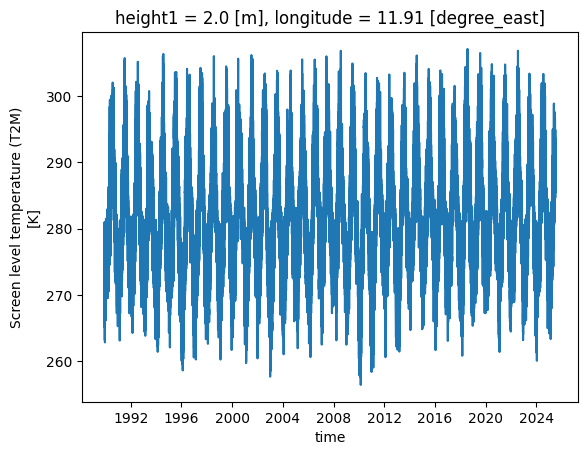

In [84]:
merged.air_temperature_2m.plot()